In [ ]:
import easyocr
import re

# Initialize EasyOCR Reader
reader = easyocr.Reader(['fr'])  # Assuming text is in French

# Function to extract required data
def extract_fields(image_path):
    result = reader.readtext(image_path, detail=0)
    text = " ".join(result)
    print(text)
    # Regex patterns
    name_pattern = r"NOM\s*\/\s*PRENOM\s*\/\s*ADRESSE\s*(\w+)\s*(\w+)"
    date_pattern = r"DATE\s*(\d{2}\s*\d{2}\s*\d{4})"
    month_pattern = r"PERIODE\s*(\w+)"
    matricule_pattern = r"MATRICULE\s*(\d+)"

    # Extract fields
    first_name, last_name = re.search(name_pattern, text).groups() if re.search(name_pattern, text) else (None, None)
    date = re.search(date_pattern, text).group(1) if re.search(date_pattern, text) else None
    month = re.search(month_pattern, text).group(1) if re.search(month_pattern, text) else None
    matricule = re.search(matricule_pattern, text).group(1) if re.search(matricule_pattern, text) else None

    return {
        "first_name": first_name,
        "last_name": last_name,
        "date": date,
        "month": month,
        "matricule": matricule,
    }

# Example usage
image_paths = [
    "sample_images_pertus/1998_11_1_A06.jpg",
    "sample_images_pertus/1998_11_1_A07.jpg",
    # "sample_images_pertus/1998_11_1_A08.jpg",
    # "sample_images_pertus/1998_11_1_A09.jpg",
    # "sample_images_pertus/1998_11_1_A10.jpg",
    # "sample_images_pertus/1998_11_1_A11.jpg",
]

for image_path in image_paths:
    print(extract_fields(image_path))


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NoM PRENOM ADRESSE BIM GRILLE DES ENFanTS FRACTION D'INDICE SIMON FRÉDÉRIQUE BOULEVARD ISAAC ÉTIENNE INDICE INDICE Nbre Nbre MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS BRUT 1/2 PLEIN MATRICULE 449322 CODE POSTAL 23000 C elèm RaplRég LIBELLÉ RUBRIQUE LIBELLÉ COMPLÉMENTAIRE Mont de base Nbreou taux MONTANT Base $ $ Base $ $ Base $ $ BRUT NET maladie mat congé vieillesse RETRAITE A RETRAITE B FISCAL FISCAL NET A Mensuel PAYER Annuel Mode de Code ÉTABLISSEMENT VILLE ÉTABLISSEMENT N' CoMPtE 22? Serv utile Serv payout GRADE N' SEC soc DATE Periode INGÉNIEUR FRIGORISTE p139609719008 30 11 1998 novembRe
{'first_name': None, 'last_name': None, 'date': None, 'month': None, 'matricule': '449322'}
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NOM PRENOM ADRESSE EM GRILLE DES ENFANTS FRACTION D'INDICE AUBERT MARC 75, AVENUE JOUBERT INDICE INDICE Nbre Nbre BRUT MAJORÉ ÉCH JOURS JOURS FRACTION DE 

In [7]:
import re

def extract_fields_from_ocr(ocr_text):
    # Initialize the fields
    fields = {
        'first_name': None,
        'last_name': None,
        'date': None,
        'month': None,
    }
    
    # Extract the last word as the month
    month = ocr_text.strip().split()[-1]
    fields['month'] = month.capitalize()
    
    # Extract the date (before the month)
    date_match = re.search(r'(\d{2}\s+\d{2}\s+\d{4})\s+' + re.escape(month), ocr_text, re.IGNORECASE)
    if date_match:
        fields['date'] = date_match.group(1)
    
    # Extract first name and last name after "D'INDICE"
    name_match = re.search(r"D'INDICE\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)", ocr_text, re.IGNORECASE)
    if name_match:
        fields['last_name'] = name_match.group(1).capitalize()
        fields['first_name'] = name_match.group(2).capitalize()
    
    return fields

# Example OCR results
ocr_text_1 = """VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NOM PRENOM ADRESSE BIM GRILLE DES ENFanTS FRACTION D'INDICE SIMON FRÉDÉRIQUE BOULEVARD ISAAC ÉTIENNE INDICE INDICE Nbre Nbre MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS BRUT 1/2 PLEIN MATRICULE 449322 CODE POSTAL 23000 DATE 30 11 1998 NOVEMBRE"""
ocr_text_2 = """VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NOM PRENOM ADRESSE EM GRILLE DES ENFANTS FRACTION D'INDICE AUBERT MARC 75, AVENUE JOUBERT INDICE INDICE Nbre Nbre BRUT MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS 1/2 PLEIN MATRICULE 3436300 CODE POSTAL 23000 DATE 30 11 1998 NOVEMBRE"""

# Extract fields
fields_1 = extract_fields_from_ocr(ocr_text_1)
fields_2 = extract_fields_from_ocr(ocr_text_2)

# Print results
print(fields_1)
print(fields_2)


{'first_name': 'Frédérique', 'last_name': 'Simon', 'date': '30 11 1998', 'month': 'Novembre'}
{'first_name': 'Marc', 'last_name': 'Aubert', 'date': '30 11 1998', 'month': 'Novembre'}


In [11]:
import easyocr
import re

# Initialize EasyOCR Reader
reader = easyocr.Reader(['fr'])  # Assuming the text is in French

# Function to extract required data
def extract_fields(image_path):
    # Read text from image
    result = reader.readtext(image_path, detail=0)
    text = " ".join(result)
    print("OCR Result:")
    print(text)  # Print the OCR result for verification
    
    # Regex patterns for fields
    name_pattern = r"D'INDICE\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)"
    date_pattern = r"DATE\s+(\d{2}\s+\d{2}\s+\d{4})"
    month_pattern = r"PERIODE\s+(\w+)"
    matricule_pattern = r"MATRICULE\s*(\d+)"

    # Extract fields using regex
    first_name, last_name = (None, None)
    name_match = re.search(name_pattern, text, re.IGNORECASE)
    if name_match:
        first_name = name_match.group(1).capitalize()
        last_name = name_match.group(2).capitalize()
    
    date = None
    date_match = re.search(date_pattern, text)
    if date_match:
        date = date_match.group(1)

    month = None
    month_match = re.search(month_pattern, text, re.IGNORECASE)
    if month_match:
        month = month_match.group(1).capitalize()

    matricule = None
    matricule_match = re.search(matricule_pattern, text)
    if matricule_match:
        matricule = matricule_match.group(1)

    # Return extracted fields as a dictionary
    return {
        "first_name": first_name,
        "last_name": last_name,
        "date": date,
        "month": month,
        "matricule": matricule,
    }

# Example usage with file paths
image_paths = [
    "sample_images_pertus/1998_11_1_A06.jpg",
    "sample_images_pertus/1998_11_1_A07.jpg",
    "sample_images_pertus/1998_11_1_A08.jpg",
]

for image_path in image_paths:
    extracted_fields = extract_fields(image_path)
    print("\nExtracted Fields:")
    print(extracted_fields)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.


OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NoM PRENOM ADRESSE BIM GRILLE DES ENFanTS FRACTION D'INDICE SIMON FRÉDÉRIQUE BOULEVARD ISAAC ÉTIENNE INDICE INDICE Nbre Nbre MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS BRUT 1/2 PLEIN MATRICULE 449322 CODE POSTAL 23000 C elèm RaplRég LIBELLÉ RUBRIQUE LIBELLÉ COMPLÉMENTAIRE Mont de base Nbreou taux MONTANT Base $ $ Base $ $ Base $ $ BRUT NET maladie mat congé vieillesse RETRAITE A RETRAITE B FISCAL FISCAL NET A Mensuel PAYER Annuel Mode de Code ÉTABLISSEMENT VILLE ÉTABLISSEMENT N' CoMPtE 22? Serv utile Serv payout GRADE N' SEC soc DATE Periode INGÉNIEUR FRIGORISTE p139609719008 30 11 1998 novembRe

Extracted Fields:
{'first_name': 'Simon', 'last_name': 'Frédérique', 'date': None, 'month': 'Ingénieur', 'matricule': '449322'}
OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NOM PRENOM ADRESSE EM GRILLE DES ENFANTS FRACTION D'INDICE AUBERT MARC 75, AVENUE JOUBERT IND

In [13]:
import easyocr
import re

# Initialize EasyOCR Reader
reader = easyocr.Reader(['fr'])  # Assuming the text is in French

# Function to extract required data
def extract_fields(image_path):
    # Read text from image
    result = reader.readtext(image_path, detail=0)
    text = " ".join(result)
    print("\nOCR Result:")
    print(text)  # Print the OCR result for verification
    
    # Preprocess text to remove unnecessary spaces or artifacts
    text = re.sub(r"\s+", " ", text)  # Replace multiple spaces with single space

    # Regex patterns for fields
    name_pattern = r"D'INDICE\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)"
    date_pattern = r"DATE\s+(\d{2}\s?\d{2}\s?\d{4})"
    month_pattern = r"PERIODE\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)"
    matricule_pattern = r"MATRICULE\s*(\d+)"

    # Extract fields using regex
    first_name, last_name = (None, None)
    name_match = re.search(name_pattern, text, re.IGNORECASE)
    if name_match:
        first_name = name_match.group(1).capitalize()
        last_name = name_match.group(2).capitalize()

    date = None
    date_match = re.search(date_pattern, text)
    if date_match:
        date = date_match.group(1).replace(" ", "-")  # Format date as DD-MM-YYYY for consistency

    month = None
    month_match = re.search(month_pattern, text, re.IGNORECASE)
    if month_match:
        month = month_match.group(1).capitalize()

    matricule = None
    matricule_match = re.search(matricule_pattern, text)
    if matricule_match:
        matricule = matricule_match.group(1)

    # Debugging: Print the matched results
    print(f"Matched Fields - First Name: {first_name}, Last Name: {last_name}, Date: {date}, Month: {month}, Matricule: {matricule}")

    # Return extracted fields as a dictionary
    return {
        "first_name": first_name,
        "last_name": last_name,
        "date": date,
        "month": month,
        "matricule": matricule,
    }

# Example usage with file paths
image_paths = [
    "sample_images_pertus/1998_11_1_A06.jpg",
    "sample_images_pertus/1998_11_1_A07.jpg",
    "sample_images_pertus/1998_11_1_A08.jpg",
]

for image_path in image_paths:
    extracted_fields = extract_fields(image_path)
    print("\nExtracted Fields:")
    print(extracted_fields)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NoM PRENOM ADRESSE BIM GRILLE DES ENFanTS FRACTION D'INDICE SIMON FRÉDÉRIQUE BOULEVARD ISAAC ÉTIENNE INDICE INDICE Nbre Nbre MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS BRUT 1/2 PLEIN MATRICULE 449322 CODE POSTAL 23000 C elèm RaplRég LIBELLÉ RUBRIQUE LIBELLÉ COMPLÉMENTAIRE Mont de base Nbreou taux MONTANT Base $ $ Base $ $ Base $ $ BRUT NET maladie mat congé vieillesse RETRAITE A RETRAITE B FISCAL FISCAL NET A Mensuel PAYER Annuel Mode de Code ÉTABLISSEMENT VILLE ÉTABLISSEMENT N' CoMPtE 22? Serv utile Serv payout GRADE N' SEC soc DATE Periode INGÉNIEUR FRIGORISTE p139609719008 30 11 1998 novembRe
Matched Fields - First Name: Simon, Last Name: Frédérique, Date: None, Month: Ingénieur, Matricule: 449322

Extracted Fields:
{'first_name': 'Simon', 'last_name': 'Frédérique', 'date': None, 'month': 'Ingénieur', 'matricule': '449322'}

OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSA

In [14]:
import easyocr
import re

# Initialize EasyOCR Reader
reader = easyocr.Reader(['fr'])  # Assuming the text is in French

# Function to extract required data
def extract_fields(image_path):
    # Read text from image
    result = reader.readtext(image_path, detail=0)
    text = " ".join(result)
    print("\nOCR Result:")
    print(text)  # Print the OCR result for verification
    
    # Preprocess text to remove unnecessary spaces or artifacts
    text = re.sub(r"\s+", " ", text.strip())  # Replace multiple spaces with single space and strip trailing spaces

    # Regex patterns for fields
    name_pattern = r"D'INDICE\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)"
    matricule_pattern = r"MATRICULE\s*(\d+)"

    # Extract first and last name
    first_name, last_name = (None, None)
    name_match = re.search(name_pattern, text, re.IGNORECASE)
    if name_match:
        first_name = name_match.group(1).capitalize()
        last_name = name_match.group(2).capitalize()

    # Extract matricule
    matricule = None
    matricule_match = re.search(matricule_pattern, text)
    if matricule_match:
        matricule = matricule_match.group(1)

    # Extract the last word as month
    words = text.split()
    month = words[-1].capitalize() if words else None

    # Extract the date before the month
    date_pattern = r"(\d{2}\s?\d{2}\s?\d{4})"
    date_match = re.search(date_pattern, text[:text.rfind(month)], re.IGNORECASE) if month else None
    date = date_match.group(1).replace(" ", "-") if date_match else None  # Format date as DD-MM-YYYY

    # Debugging: Print the matched results
    print(f"Matched Fields - First Name: {first_name}, Last Name: {last_name}, Date: {date}, Month: {month}, Matricule: {matricule}")

    # Return extracted fields as a dictionary
    return {
        "first_name": first_name,
        "last_name": last_name,
        "date": date,
        "month": month,
        "matricule": matricule,
    }

# Example usage with file paths
image_paths = [
    "sample_images_pertus/1998_11_1_A06.jpg",
    "sample_images_pertus/1998_11_1_A07.jpg",
    "sample_images_pertus/1998_11_1_A08.jpg",
]

for image_path in image_paths:
    extracted_fields = extract_fields(image_path)
    print("\nExtracted Fields:")
    print(extracted_fields)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NoM PRENOM ADRESSE BIM GRILLE DES ENFanTS FRACTION D'INDICE SIMON FRÉDÉRIQUE BOULEVARD ISAAC ÉTIENNE INDICE INDICE Nbre Nbre MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS BRUT 1/2 PLEIN MATRICULE 449322 CODE POSTAL 23000 C elèm RaplRég LIBELLÉ RUBRIQUE LIBELLÉ COMPLÉMENTAIRE Mont de base Nbreou taux MONTANT Base $ $ Base $ $ Base $ $ BRUT NET maladie mat congé vieillesse RETRAITE A RETRAITE B FISCAL FISCAL NET A Mensuel PAYER Annuel Mode de Code ÉTABLISSEMENT VILLE ÉTABLISSEMENT N' CoMPtE 22? Serv utile Serv payout GRADE N' SEC soc DATE Periode INGÉNIEUR FRIGORISTE p139609719008 30 11 1998 novembRe
Matched Fields - First Name: Simon, Last Name: Frédérique, Date: 12345679, Month: Novembre, Matricule: 449322

Extracted Fields:
{'first_name': 'Simon', 'last_name': 'Frédérique', 'date': '12345679', 'month': 'Novembre', 'matricule': '449322'}

OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PA

In [16]:
import easyocr
import re

# Initialize EasyOCR Reader
reader = easyocr.Reader(['fr'])  # Assuming the text is in French

# Function to extract required data
def extract_fields(image_path):
    # Read text from image
    result = reader.readtext(image_path, detail=0)
    text = " ".join(result)
    print("\nOCR Result:")
    print(text)  # Print the OCR result for verification
    
    # Preprocess text to remove unnecessary spaces or artifacts
    text = re.sub(r"\s+", " ", text.strip())  # Replace multiple spaces with single space and strip trailing spaces

    # Regex patterns for fields
    name_pattern = r"D'INDICE\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)"
    matricule_pattern = r"MATRICULE\s*(\d+)"
    date_pattern = r"(\d{2}\s\d{2}\s\d{4})"  # Matches "DD MM YYYY"

    # Extract first and last name
    first_name, last_name = (None, None)
    name_match = re.search(name_pattern, text, re.IGNORECASE)
    if name_match:
        first_name = name_match.group(1).capitalize()
        last_name = name_match.group(2).capitalize()

    # Extract matricule
    matricule = None
    matricule_match = re.search(matricule_pattern, text)
    if matricule_match:
        matricule = matricule_match.group(1)

    # Extract the last word as month
    words = text.split()
    month = words[-1].capitalize() if words else None

    # Extract the date before the month
    date = None
    if month:
        date_match = re.search(date_pattern, text[:text.rfind(month)], re.IGNORECASE)
        if date_match:
            date = date_match.group(1).replace(" ", "-")  # Format date as DD-MM-YYYY

    # Debugging: Print the matched results
    print(f"Matched Fields - First Name: {first_name}, Last Name: {last_name}, Date: {date}, Month: {month}, Matricule: {matricule}")

    # Return extracted fields as a dictionary
    return {
        "first_name": first_name,
        "last_name": last_name,
        "date": date,
        "month": month,
        "matricule": matricule,
    }

# Example usage with file paths
image_paths = [
    "sample_images_pertus/1998_11_1_A06.jpg",
    "sample_images_pertus/1998_11_1_A07.jpg",
    "sample_images_pertus/1998_11_1_A08.jpg",
]

for image_path in image_paths:
    extracted_fields = extract_fields(image_path)
    print("\nExtracted Fields:")
    print(extracted_fields)


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NoM PRENOM ADRESSE BIM GRILLE DES ENFanTS FRACTION D'INDICE SIMON FRÉDÉRIQUE BOULEVARD ISAAC ÉTIENNE INDICE INDICE Nbre Nbre MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS BRUT 1/2 PLEIN MATRICULE 449322 CODE POSTAL 23000 C elèm RaplRég LIBELLÉ RUBRIQUE LIBELLÉ COMPLÉMENTAIRE Mont de base Nbreou taux MONTANT Base $ $ Base $ $ Base $ $ BRUT NET maladie mat congé vieillesse RETRAITE A RETRAITE B FISCAL FISCAL NET A Mensuel PAYER Annuel Mode de Code ÉTABLISSEMENT VILLE ÉTABLISSEMENT N' CoMPtE 22? Serv utile Serv payout GRADE N' SEC soc DATE Periode INGÉNIEUR FRIGORISTE p139609719008 30 11 1998 novembRe
Matched Fields - First Name: Simon, Last Name: Frédérique, Date: 30-11-1998, Month: Novembre, Matricule: 449322

Extracted Fields:
{'first_name': 'Simon', 'last_name': 'Frédérique', 'date': '30-11-1998', 'month': 'Novembre', 'matricule': '449322'}

OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN D

In [18]:
1455%10

5

In [20]:
1455//10

145

In [ ]:
import cv2
import json
import os
import easyocr
from datetime import datetime

# Function to process OCR and save results
def process_ocr_and_save(image_path, input_folder):
    # Initialize the EasyOCR reader
    reader = easyocr.Reader(['en'])  # You can change 'en' to any language you need

    # Perform OCR on the image
    results = reader.readtext(image_path)

    # Extract OCR text to save in a .txt file
    ocr_text = "\n".join([result[1] for result in results])

    # Define output paths
    text_result_folder = os.path.join(input_folder, "text_result")
    json_result_folder = os.path.join(input_folder, "json_result")

    # Create the output folders if they do not exist
    if not os.path.exists(text_result_folder):
        os.makedirs(text_result_folder)
    if not os.path.exists(json_result_folder):
        os.makedirs(json_result_folder)

    # Extract the image name without extension
    image_name = os.path.splitext(os.path.basename(image_path))[0]

    # Save the OCR text in a .txt file
    text_file_path = os.path.join(text_result_folder, f"{image_name}.txt")
    with open(text_file_path, 'w') as text_file:
        text_file.write(ocr_text)

    # Prepare the JSON format output
    coco_output = {
        "imagePath": image_name,
        "imageHeight": int(cv2.imread(image_path).shape[0]),
        "imageWidth": int(cv2.imread(image_path).shape[1]),
        "shapes": []
    }

    # Save the results in JSON format
    for result in results:
        text = result[1]
        prob = result[2]
        bbox = result[0]

        # Prepare the bounding box coordinates (for JSON output)
        points = [(int(point[0]), int(point[1])) for point in bbox]

        # Add the shape info to the coco_output dictionary
        shape_info = {
            "label": "OCR Text",
            "points": points,
            "ocr_value": {
                "text": text,
                "confidence": prob
            }
        }
        coco_output["shapes"].append(shape_info)

    # Save the JSON file
    json_file_path = os.path.join(json_result_folder, f"{image_name}.json")
    with open(json_file_path, 'w', encoding='utf-8') as json_file:
        json.dump(coco_output, json_file, ensure_ascii=False, indent=4)

    print(f"Processed {image_name}: Text saved to {text_file_path}, JSON saved to {json_file_path}")

# Main function to loop over all images in the folder
def process_folder(input_folder):
    # Loop through all image files in the folder
    for image_name in os.listdir(input_folder):
        image_path = os.path.join(input_folder, image_name)

        # Only process image files (e.g., .jpg, .jpeg, .png)
        if image_name.endswith(('.jpg', '.jpeg', '.png')):
            print(f"Processing image: {image_name}")

            process_ocr_and_save(image_path, input_folder)

if __name__ == "__main__":
    # Input folder path (you can modify this to prompt the user or accept via command-line arguments)
    input_folder = input("Enter the path to the folder containing images: ")
    process_folder(input_folder)
    print("Process Done")


K


column name for csv

image_name,fist_name_ocr_value,fist_name_confidence,fist_name_boundingbox,last_name_ocr_value,last_name_confidence,last_name_bounding_box,matricule_ocr_value,matricule_confidence,matricule_boundingbox,date_ocr_value,date_confidence,date_boundingbox,month_ocr_value,month_confidence,month_boundingbox,

In [5]:
import easyocr
import re
import os
import csv

# Initialize EasyOCR Reader
reader = easyocr.Reader(["fr"])  # Assuming the text is in French

# French months list to improve month extraction
french_months = [
    "janvier",
    "février",
    "mars",
    "avril",
    "mai",
    "juin",
    "juillet",
    "août",
    "septembre",
    "octobre",
    "novembre",
    "décembre",
]


# Function to extract required data
def extract_fields(image_path):
    # Extract the year and month from the image filename
    filename = os.path.basename(image_path)
    # Assuming filename format: "1980_06_1_B01.jpg" -> year=1980, month=06
    filename_match = re.match(r"(\d{4})_(\d{2})", filename)
    filename_year, filename_month = None, None
    if filename_match:
        filename_year = filename_match.group(1)
        filename_month = filename_match.group(2)

    # Read text from image with bounding box and confidence
    results = reader.readtext(
        image_path, detail=1
    )  # detail=1 provides bounding box and confidence
    text = " ".join([result[1] for result in results])
    print("\nOCR Result:")
    print(text)  # Print the OCR result for verification

    # Preprocess text to remove unnecessary spaces or artifacts
    text = re.sub(
        r"\s+", " ", text.strip()
    )  # Replace multiple spaces with single space and strip trailing spaces

    # Regex patterns for fields
    name_pattern = r"D'INDICE\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)\s+([A-ZÉÈÊÀÙÂÔÛÎÎÇ\-']+)"
    matricule_pattern = r"MATRICULE\s*(\d+)"
    # Updated date pattern to capture day, month, and year (allowing any non-numeric characters in the year)
    date_pattern = (
        r"(\d{2})\s(\d{2})\s(\w{3,4})"  # Matches "DD MM YYYY" (with flexible year)
    )

    # Initialize placeholders for field-specific OCR data
    first_name_data = None
    last_name_data = None
    matricule_data = None
    date_data = None
    month_data = None

    # Extract first and last name
    name_match = re.search(name_pattern, text, re.IGNORECASE)
    if name_match:
        first_name_data = {
            "ocr_value": name_match.group(1).capitalize(),
            "confidence": max(
                [
                    result[2]
                    for result in results
                    if name_match.group(1).lower() in result[1].lower()
                ],
                default=0,
            ),
            "bounding_box": next(
                (
                    result[0]
                    for result in results
                    if name_match.group(1).lower() in result[1].lower()
                ),
                None,
            ),
        }
        last_name_data = {
            "ocr_value": name_match.group(2).capitalize(),
            "confidence": max(
                [
                    result[2]
                    for result in results
                    if name_match.group(2).lower() in result[1].lower()
                ],
                default=0,
            ),
            "bounding_box": next(
                (
                    result[0]
                    for result in results
                    if name_match.group(2).lower() in result[1].lower()
                ),
                None,
            ),
        }

    # Extract matricule
    matricule_match = re.search(matricule_pattern, text)
    if matricule_match:
        matricule_data = {
            "ocr_value": matricule_match.group(1),
            "confidence": max(
                [
                    result[2]
                    for result in results
                    if matricule_match.group(1) in result[1]
                ],
                default=0,
            ),
            "bounding_box": next(
                (
                    result[0]
                    for result in results
                    if matricule_match.group(1) in result[1]
                ),
                None,
            ),
        }

    # Extract the month by searching known French months
    month = None
    for m in french_months:
        if m in text.lower():
            month_data = {
                "ocr_value": m.capitalize(),
                "confidence": max(
                    [result[2] for result in results if m in result[1].lower()],
                    default=0,
                ),
                "bounding_box": next(
                    (result[0] for result in results if m in result[1].lower()), None
                ),
            }
            break

    # Extract date (day-month-year)
    date = None
    if month_data:
        date_match = re.search(
            date_pattern, text[: text.rfind(month_data["ocr_value"])], re.IGNORECASE
        )
        if date_match:
            day = date_match.group(1).zfill(2)  # Ensure two digits for day
            month_num = date_match.group(2).zfill(2)  # Ensure two digits for month
            year = date_match.group(3)

            # Post-processing: Replace common OCR errors in year (like 'q' instead of '0')
            year = re.sub(
                r"[^\d]", "0", year
            )  # Replace non-numeric characters with '0'

            # Cross-check year and month with the filename
            if filename_year and filename_month:
                if year != filename_year:
                    print(
                        f"Year mismatch: OCR found {year}, but filename has {filename_year}. Using {filename_year}."
                    )
                    year = filename_year
                if month_num != filename_month:
                    print(
                        f"Month mismatch: OCR found {month_num}, but filename has {filename_month}. Using {filename_month}."
                    )
                    month_num = filename_month

            date_data = {
                "ocr_value": f"{day}-{month_num}-{year}",  # Format as DD-MM-YYYY
                "confidence": max(
                    [
                        result[2]
                        for result in results
                        if f"{day}-{month_num}-{year}" in result[1]
                    ],
                    default=0,
                ),
                "bounding_box": next(
                    (
                        result[0]
                        for result in results
                        if f"{day}-{month_num}-{year}" in result[1]
                    ),
                    None,
                ),
            }

    # Prepare row data for CSV
    csv_row = [
        filename,
        first_name_data["ocr_value"] if first_name_data else "",
        first_name_data["confidence"] if first_name_data else "",
        first_name_data["bounding_box"] if first_name_data else "",
        last_name_data["ocr_value"] if last_name_data else "",
        last_name_data["confidence"] if last_name_data else "",
        last_name_data["bounding_box"] if last_name_data else "",
        matricule_data["ocr_value"] if matricule_data else "",
        matricule_data["confidence"] if matricule_data else "",
        matricule_data["bounding_box"] if matricule_data else "",
        date_data["ocr_value"] if date_data else "",
        date_data["confidence"] if date_data else "",
        date_data["bounding_box"] if date_data else "",
        month_data["ocr_value"] if month_data else "",
        month_data["confidence"] if month_data else "",
        month_data["bounding_box"] if month_data else "",
    ]

    # Return the row data
    return csv_row


# Example usage with file paths
image_paths = [
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A06.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A07.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A08.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A09.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A10.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A11.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A12.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A13.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A14.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_A14.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_B01.jpg",
    "/home/aurexus/Videos/easy_ocr/sample_images_pertus/1998_11_1_B02.jpg",
]

# Open CSV file for writing
csv_filename = "ocr_extracted_data.csv"
with open(csv_filename, mode="w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    # Write header
    csv_writer.writerow(
        [
            "image_name",
            "first_name_ocr_value",
            "first_name_confidence",
            "first_name_boundingbox",
            "last_name_ocr_value",
            "last_name_confidence",
            "last_name_bounding_box",
            "matricule_ocr_value",
            "matricule_confidence",
            "matricule_boundingbox",
            "date_ocr_value",
            "date_confidence",
            "date_boundingbox",
            "month_ocr_value",
            "month_confidence",
            "month_boundingbox",
        ]
    )

    # Process each image and write results to CSV
    for image_path in image_paths:
        csv_row = extract_fields(image_path)
        # Write the row to the CSV file
        csv_writer.writerow(csv_row)

print(f"CSV output written to {csv_filename}")


# Function to extract date confidence and bounding box
def extract_date_data(image_path):
    # Read text from image with bounding box and confidence
    results = reader.readtext(
        image_path, detail=1
    )  # detail=1 provides bounding box and confidence
    text = " ".join([result[1] for result in results])
    print("\nOCR Result:")
    print(text)  # Print the OCR result for verification

    # Preprocess text to remove unnecessary spaces or artifacts
    text = re.sub(
        r"\s+", " ", text.strip()
    )  # Replace multiple spaces with single space and strip trailing spaces

    # Regex pattern for date (DD MM YYYY or DD MM YYY)
    date_pattern = r"\d{2} \d{2} \d{3}"  # This matches the pattern 'DD MM YYYY' where YYYY can have 3 digits

    # Initialize placeholders for field-specific OCR data
    date_data = None

    # Extract date using the regex pattern
    date_match = re.search(date_pattern, text)
    if date_match:
        date_str = date_match.group(0)  # Get the full matched date string

        # Find the matching bounding box and confidence for the date string
        for result in results:
            if date_str in result[1]:  # Check if the OCR result contains the date
                date_data = {
                    "ocr_value": date_str,
                    "confidence": result[2],  # Get the confidence for the matching text
                    "bounding_box": result[
                        0
                    ],  # Get the bounding box for the matching text
                }
                break

    # Return date data (None if not found)
    return date_data


# Read the existing CSV and update date_confidence and date_boundingbox
rows = []
with open(csv_filename, mode="r", newline="", encoding="utf-8") as csvfile:
    csv_reader = csv.reader(csvfile)
    header = next(csv_reader)  # Read the header row

    # Append rows with updated date_confidence and date_boundingbox
    for row in csv_reader:
        image_name = row[0]  # Get the image name
        # image_path = (
        #     f"/content/{image_name}"  # Assuming the images are stored under '/content/'
        # )

        # Extract updated date data
        date_data = extract_date_data(image_path)

        # Update the columns in the row for date_confidence and date_boundingbox
        if date_data:
            row[11] = date_data["confidence"]  # Update date_confidence (column 12)
            row[12] = date_data["bounding_box"]  # Update date_boundingbox (column 13)

        # Append the updated row to the rows list
        rows.append(row)

# Write the updated rows back to the CSV
with open(csv_filename, mode="w", newline="", encoding="utf-8") as csvfile:
    csv_writer = csv.writer(csvfile)
    csv_writer.writerow(header)  # Write the header row
    csv_writer.writerows(rows)  # Write all the updated rows

print(f"CSV file '{csv_filename}' has been updated successfully.")


Neither CUDA nor MPS are available - defaulting to CPU. Note: This module is much faster with a GPU.



OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NoM PRENOM ADRESSE BIM GRILLE DES ENFanTS FRACTION D'INDICE SIMON FRÉDÉRIQUE BOULEVARD ISAAC ÉTIENNE INDICE INDICE Nbre Nbre MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS BRUT 1/2 PLEIN MATRICULE 449322 CODE POSTAL 23000 C elèm RaplRég LIBELLÉ RUBRIQUE LIBELLÉ COMPLÉMENTAIRE Mont de base Nbreou taux MONTANT Base $ $ Base $ $ Base $ $ BRUT NET maladie mat congé vieillesse RETRAITE A RETRAITE B FISCAL FISCAL NET A Mensuel PAYER Annuel Mode de Code ÉTABLISSEMENT VILLE ÉTABLISSEMENT N' CoMPtE 22? Serv utile Serv payout GRADE N' SEC soc DATE Periode INGÉNIEUR FRIGORISTE p139609719008 30 11 1998 novembRe

OCR Result:
VILLE DE NUMERO D'EMPLOYEUR PERTUS BULLETIN DE PAIE URSSAF N'12345679012 NOM PRENOM ADRESSE EM GRILLE DES ENFANTS FRACTION D'INDICE AUBERT MARC 75, AVENUE JOUBERT INDICE INDICE Nbre Nbre BRUT MAJORÉ ÉCH JOURS JOURS FRACTION DE TEMPS PERTUS 1/2 PLEIN MATRICULE 3436300 CODE POSTAL 23000 C elèm 

Plotting normal image for /home/kanna/Django/dev/EasyOCR/1998_11_1_A15.jpg


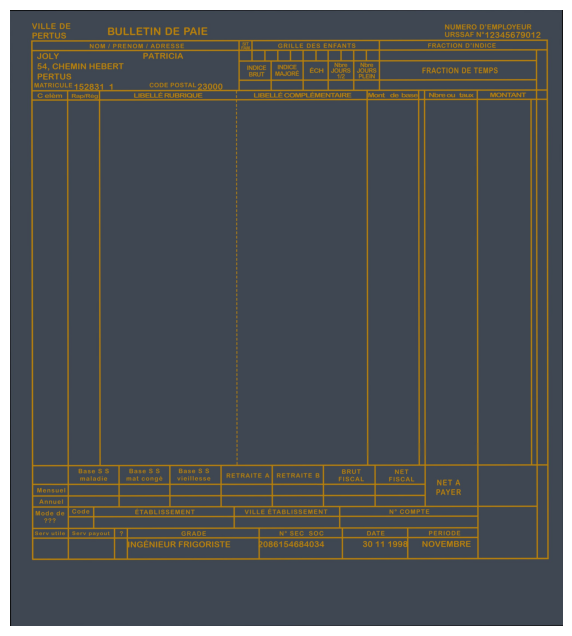

Plotting image with bounding boxes for /home/kanna/Django/dev/EasyOCR/1998_11_1_A15.jpg


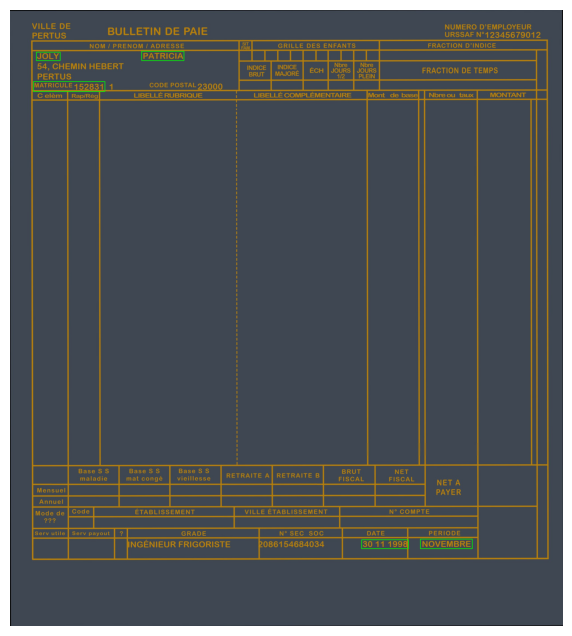

Plotting cropped images for /home/kanna/Django/dev/EasyOCR/1998_11_1_A15.jpg


TypeError: slice indices must be integers or None or have an __index__ method

In [4]:
import cv2
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

# Function to plot the image
def plot_image(image_path):
    img = Image.open(image_path)
    plt.figure(figsize=(8, 8))
    plt.imshow(img)
    plt.axis('off')
    plt.show()

# Function to plot image with bounding boxes
def plot_image_with_bounding_box(image_path, bounding_boxes):
    img = cv2.imread(image_path)
    
    for box in bounding_boxes:
        pts = np.array(box, np.int32)
        pts = pts.reshape((-1, 1, 2))
        img = cv2.polylines(img, [pts], isClosed=True, color=(0, 255, 0), thickness=2)
    
    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    
    plt.figure(figsize=(8, 8))
    plt.imshow(img_rgb)
    plt.axis('off')
    plt.show()

# Function to plot cropped image with OCR value and confidence
def plot_cropped_image(image_path, bounding_box, ocr_value, confidence):
    img = cv2.imread(image_path)
    
    # Convert bounding box to integer coordinates
    x_min, y_min = bounding_box[0]
    x_max, y_max = bounding_box[2]
    
    # Crop the image
    cropped_img = img[y_min:y_max, x_min:x_max]
    
    # Convert from BGR (OpenCV) to RGB (Matplotlib)
    cropped_img_rgb = cv2.cvtColor(cropped_img, cv2.COLOR_BGR2RGB)
    
    # Plot cropped image with OCR value and confidence
    plt.figure(figsize=(8, 8))
    plt.imshow(cropped_img_rgb)
    plt.title(f"OCR: {ocr_value}, Confidence: {confidence:.2f}")
    plt.axis('off')
    plt.show()

# Function to read CSV data and plot the images
def plot_images_from_csv(csv_file):
    # Load CSV
    df = pd.read_csv(csv_file)
    
    for index, row in df.iterrows():
        image_path = row['image_name']
        
        # Convert string bounding boxes to list of lists
        first_name_box = eval(row['first_name_boundingbox'])
        last_name_box = eval(row['last_name_bounding_box'])
        matricule_box = eval(row['matricule_boundingbox'])
        date_box = eval(row['date_boundingbox'])
        month_box = eval(row['month_boundingbox'])
        
        # Plot normal image
        print(f"Plotting normal image for {image_path}")
        plot_image(image_path)
        
        # Plot image with bounding boxes
        print(f"Plotting image with bounding boxes for {image_path}")
        plot_image_with_bounding_box(image_path, 
                                     [first_name_box, last_name_box, matricule_box, date_box, month_box])
        
        # Plot cropped images with OCR value and confidence
        print(f"Plotting cropped images for {image_path}")
        plot_cropped_image(image_path, first_name_box, row['first_name_ocr_value'], row['first_name_confidence'])
        plot_cropped_image(image_path, last_name_box, row['last_name_ocr_value'], row['last_name_confidence'])
        plot_cropped_image(image_path, matricule_box, row['matricule_ocr_value'], row['matricule_confidence'])
        plot_cropped_image(image_path, date_box, row['date_ocr_value'], row['date_confidence'])
        plot_cropped_image(image_path, month_box, row['month_ocr_value'], row['month_confidence'])

# Example usage
csv_file = '/home/kanna/Django/dev/EasyOCR/ocr_extracted_data.csv'
plot_images_from_csv(csv_file)
